# Урок 2. Масштабирование признаков. Регуляризация. Стохастический градиентный спуск.

<h1>План урока<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Масштабирование-признаков" data-toc-modified-id="Масштабирование-признаков-1">Масштабирование признаков</a></span><ul class="toc-item"><li><span><a href="#Нормализация-[0,-1]" data-toc-modified-id="Нормализация-[0,-1]-1.1">Нормализация [0, 1]</a></span></li><li><span><a href="#Стандартизация" data-toc-modified-id="Стандартизация-1.2">Стандартизация</a></span></li></ul></li><li><span><a href="#Стохастический-градиентный-спуск-(Stochastic-Gradient-Descent,-SGD)" data-toc-modified-id="Стохастический-градиентный-спуск-(Stochastic-Gradient-Descent,-SGD)-2">Стохастический градиентный спуск (Stochastic Gradient Descent, SGD)</a></span></li><li><span><a href="#Регуляризация" data-toc-modified-id="Регуляризация-3">Регуляризация</a></span><ul class="toc-item"><li><span><a href="#L1-регуляризация---Lasso" data-toc-modified-id="L1-регуляризация---Lasso-3.1">L1 регуляризация - Lasso</a></span></li><li><span><a href="#L2-регуляризация---Ridge" data-toc-modified-id="L2-регуляризация---Ridge-3.2">L2 регуляризация - Ridge</a></span></li></ul></li><li><span><a href="#Домашние-задания" data-toc-modified-id="Домашние-задания-4">Домашние задания</a></span></li></ul></div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14,
                     'xtick.labelsize': 14})

## Масштабирование признаков

In [2]:
# К признаку стажа добавим новые признаки
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],  # стаж
              [500, 700, 750, 600, 1450,        # средняя стоимость занятия
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]])  # квалификация репетитора
               
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]    # средний балл ЕГЭ (целевая переменная)

In [3]:
np.linalg.inv(X @ X.T) @ X @ y

array([3.98828270e+01, 2.18657683e+00, 2.94591674e-03, 5.27047320e+00])

### Нормализация [0, 1]

In [4]:
X[1].min(), X[1].max()

(0, 10)

In [5]:
X[2].min(), X[2].max()

(450, 2000)

In [6]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)
X_norm

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

$$x_{ij} = \frac{x_{ij} - min_{j} (x_{ij})}{max_{j} (x_{ij})-min_{j} (x_{ij})}$$

In [7]:
X_norm[1] = (X[1] - X[1].min()) / (X[1].max() - X[1].min())
X_norm[1]

array([0.1, 0.1, 0.2, 0.1, 0.3, 0. , 0.5, 1. , 0.1, 0.2])

In [8]:
X_norm[2] = (X[2] - X[2].min()) / (X[2].max() - X[2].min())
X_norm[2]

array([0.03225806, 0.16129032, 0.19354839, 0.09677419, 0.64516129,
       0.22580645, 0.67741935, 1.        , 0.        , 0.35483871])

### Стандартизация

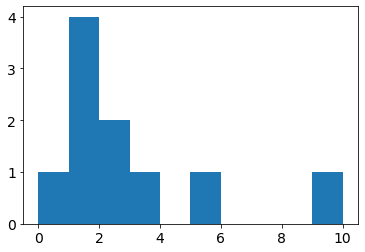

In [9]:
plt.hist(X[1]);

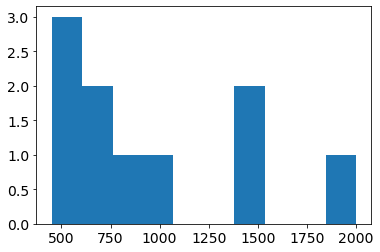

In [10]:
plt.hist(X[2]);

$$s_{ij}=\frac{x_{ij} - \mu_{j}}{\sigma_{j}}$$

In [11]:
X_st = X.copy().astype(np.float64)

X_st[1] = (X[1] - X[1].mean()) / X[1].std()
X_st[1]

array([-0.57142857, -0.57142857, -0.21428571, -0.57142857,  0.14285714,
       -0.92857143,  0.85714286,  2.64285714, -0.57142857, -0.21428571])

In [12]:
X_st[1].mean(), X_st[1].std()

(3.3306690738754695e-17, 1.0)

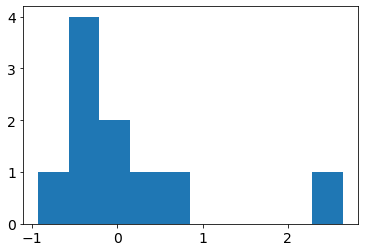

In [13]:
plt.hist(X_st[1]);

In [14]:
def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res

In [15]:
X_st[2] = calc_std_feat(X[2])
X_st[3] = calc_std_feat(X[3])
print(X_st[2])
print(X_st[3])

[-0.97958969 -0.56713087 -0.46401617 -0.77336028  0.97958969 -0.36090146
  1.08270439  2.11385144 -1.08270439  0.05155735]
[-0.89625816 -0.89625816  0.38411064 -0.89625816  0.38411064 -0.89625816
  1.66447944  1.66447944 -0.89625816  0.38411064]


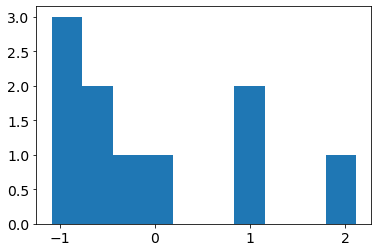

In [16]:
plt.hist(X_st[2]);

## Стохастический градиентный спуск (Stochastic Gradient Descent, SGD)

In [17]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

# Метод градиентного спуска
def eval_GD(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations + 1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [18]:
np.linalg.inv(X_st @ X_st.T) @ X_st @ y

array([57.4       ,  6.12241513,  1.42846588,  4.11637116])

In [19]:
# Градиентный спуск на исходных данных не сходится! Нужна стандартизация!
n = X.shape[1]
alpha = 1e-1
lambda_ = 0.1
w = np.array([20., 3., 0.001, 5.])

for i in range(50+1):
    y_pred = np.dot(w, X)
    err = calc_mse(y, y_pred)
    w -= (alpha * (1/n * 2 * np.sum(X * (y_pred - y))) + 2 * lambda_ * w)
    if i % 10 == 0:
        print(i, w, err)

0 [3871.344  3857.744  3855.3448 3859.344 ] 446.5657499999999
10 [2.42909422e+57 2.42909422e+57 2.42909422e+57 2.42909422e+57] 1.2300472408312598e+110
20 [1.53048187e+111 1.53048187e+111 1.53048187e+111 1.53048187e+111] 4.883030634381973e+217
30 [9.6429967e+164 9.6429967e+164 9.6429967e+164 9.6429967e+164] inf
40 [6.07569336e+218 6.07569336e+218 6.07569336e+218 6.07569336e+218] inf
50 [3.82806828e+272 3.82806828e+272 3.82806828e+272 3.82806828e+272] inf


<ipython-input-17-4d8d823d46c6>:2: RuntimeWarning: overflow encountered in square
  err = np.mean((y - y_pred)**2)


In [20]:
w_gd_st = eval_GD(X_st, y, iterations=1000, alpha=1e-2)
y_pred = np.dot(w_gd_st, X_st)
err_st = calc_mse(y, y_pred)

#w_gd = eval_GD(X, y, iterations=1000, alpha=1e-2)
#y_pred = np.dot(w_gd, X)
#err = calc_mse(y, y_pred)

w_sq_st = np.linalg.inv(X_st @ X_st.T) @ X_st @ y
y_pred = np.dot(w_sq_st, X_st)
err_sq = calc_mse(y, y_pred)

w_sq = np.linalg.inv(X @ X.T) @ X @ y
y_pred = np.dot(w_sq, X)
err = calc_mse(y, y_pred)

print(err_st, err, err_sq)

100 [49.8535115   3.66668135  3.48290916  4.46269156] 100.15332717810286
200 [56.39918805  4.16741325  3.166684    4.31348189] 41.5219247890087
300 [57.26727276  4.55529967  2.89027948  4.20488959] 40.256888196369076
400 [57.38239777  4.86307305  2.65691244  4.13291608] 40.08337439123222
500 [57.3976656   5.10794282  2.46013454  4.08693806] 39.981548483401845
600 [57.39969041  5.30327372  2.29437853  4.05919065] 39.914689617449326
700 [57.39995894  5.45948993  2.15488025  4.04404572] 39.87030433808672
800 [57.39999455  5.58474142  2.03757468  4.03744875] 39.84062200753524
900 [57.39999928  5.6854157   1.93900185  4.03650044] 39.82064430860322
1000 [57.3999999   5.76653146  1.85622321  4.03914637] 39.807122578500255
39.80701204691676 39.777746035558295 39.77774603555833


In [21]:
# Метод стохастического градиентного спуска (mini-batch SGD)
def eval_SGD(X, y, iterations, qty_in_batch, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[0]) # начальное приближение весов
    n = X.shape[1] # число наблюдений
    n_batch = n // qty_in_batch
    if n % qty_in_batch != 0:
        n_batch += 1
    # print(n_batch)
    for i in range(1, iterations + 1):
        for b in range(n_batch):
            start_ = qty_in_batch * b
            end_ = qty_in_batch * (b + 1)
            X_tmp = X[:, start_ : end_]
            y_tmp = y[start_ : end_]
            y_pred_tmp = np.dot(W, X_tmp)
            err = calc_mse(y_tmp, y_pred_tmp)
            W -= alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp.T))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [22]:
%%time

eval_SGD(X_st, y, iterations=1000, qty_in_batch=5, alpha=1e-3) # 100.15781666892349

100 [10.8180538   1.29708149  1.98771474  2.85579396] 2313.447900382401
200 [19.26728006  2.14818814  2.73911058  3.6095245 ] 1485.3622747585564
300 [26.18395752  2.6633213   3.1529941   4.03134273] 966.0865193677895
400 [31.84606228  2.98501903  3.37351129  4.26309259] 634.9580889303085
500 [36.48115179  3.19511829  3.48339473  4.38617789] 421.7489498674357
600 [40.2755092   3.34060674  3.53012056  4.44730514] 283.805256121405
700 [43.38162939  3.44846526  3.54092595  4.47326314] 194.4484902168637
800 [45.92434744  3.53418945  3.53143093  4.47940828] 136.66258928727683
900 [48.00585546  3.606682    3.51058804  4.47453575] 99.45587115636224
1000 [49.70980963  3.67106135  3.48352383  4.46367605] 75.6715685980603
Wall time: 62 ms


array([49.70980963,  3.67106135,  3.48352383,  4.46367605])

## Регуляризация

### L1 регуляризация - Lasso

$$\sum^{n}_{i=1}L_i(\vec{x}_i,{y_i},\vec{w}) + \lambda \sum^{m}_{j=1}|w_{j}| \rightarrow \underset{w}{\text{min}}$$

### L2 регуляризация - Ridge

$$\sum^{n}_{i=1}L_i(\vec{x}_i,y_i,\vec{w}) + \lambda \sum^{m}_{j=1}w_{j}^{2} \rightarrow \underset{w}{\text{min}}$$

In [23]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations + 1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + 2 * lambda_ * W)
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [24]:
eval_model_reg2(X_st, y, iterations=1000, alpha=1e-3, lambda_=0.001)

100 [10.81977943  1.29188479  1.98326638  2.85123887] 2248.174495966113
200 [19.26820475  2.14025079  2.73257885  3.60272972] 1510.52005056178
300 [26.18241951  2.65414327  3.14578694  4.02368617] 1022.7641434294361
400 [31.84103209  2.97547956  3.36642337  4.25535143] 698.0693104166692
500 [36.47205635  3.18570474  3.47683987  4.37875637] 481.18204747799444
600 [40.26209948  3.33156577  3.52428387  4.44038363] 336.04984524294935
700 [43.36388132  3.43990014  3.53586071  4.46689313] 238.83798105676905
800 [45.90238819  3.52612135  3.5271187   4.47357128] 173.68373121426237
900 [47.97990927  3.59908764  3.50697503  4.46917888] 129.99460131981883
1000 [49.68015829  3.66389563  3.48054215  4.45873282] 100.6854252225823


array([49.68015829,  3.66389563,  3.48054215,  4.45873282])

In [25]:
# В некоторых алгоритмах используется обратный коэффициент
lambda_=1e-5
C = 1/lambda_

## Домашние задания

1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).  

2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?  

3. *Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

4. *Сравните на графиках изменение весов признаков от lambda в L1-регуляризации и L2-регуляризации (на данных из урока).

5. *Постройте графики зависимости весов двух признаков (стаж и стоимость занятия) от количества итераций для градиентного спуска и для стохастического градиентного спуска (на данных из урока).

## Task №1

In [35]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    iteration_data = []
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations + 1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + 2 * lambda_ * W)
    return W

In [161]:
lambdas = np.geomspace(start=1e-5, stop=1e-1, num=25)
res = []
for l in lambdas:
    out = list(eval_model_reg2(X_st, y, iterations=1000, alpha=1e-3, lambda_=l))
    out.append(l)
    res.append(out)
    
res = np.array(res)
res

array([[4.97140424e+01, 3.66443213e+00, 3.48148744e+00, 4.46133044e+00,
        1.00000000e-05],
       [4.97138822e+01, 3.66442960e+00, 3.48148297e+00, 4.46131816e+00,
        1.46779927e-05],
       [4.97136471e+01, 3.66442588e+00, 3.48147641e+00, 4.46130013e+00,
        2.15443469e-05],
       [4.97133020e+01, 3.66442043e+00, 3.48146679e+00, 4.46127367e+00,
        3.16227766e-05],
       [4.97127954e+01, 3.66441242e+00, 3.48145266e+00, 4.46123483e+00,
        4.64158883e-05],
       [4.97120519e+01, 3.66440066e+00, 3.48143192e+00, 4.46117782e+00,
        6.81292069e-05],
       [4.97109605e+01, 3.66438340e+00, 3.48140149e+00, 4.46109415e+00,
        1.00000000e-04],
       [4.97093588e+01, 3.66435807e+00, 3.48135681e+00, 4.46097135e+00,
        1.46779927e-04],
       [4.97070078e+01, 3.66432088e+00, 3.48129124e+00, 4.46079111e+00,
        2.15443469e-04],
       [4.97035574e+01, 3.66426628e+00, 3.48119500e+00, 4.46052658e+00,
        3.16227766e-04],
       [4.96984937e+01, 3.6641

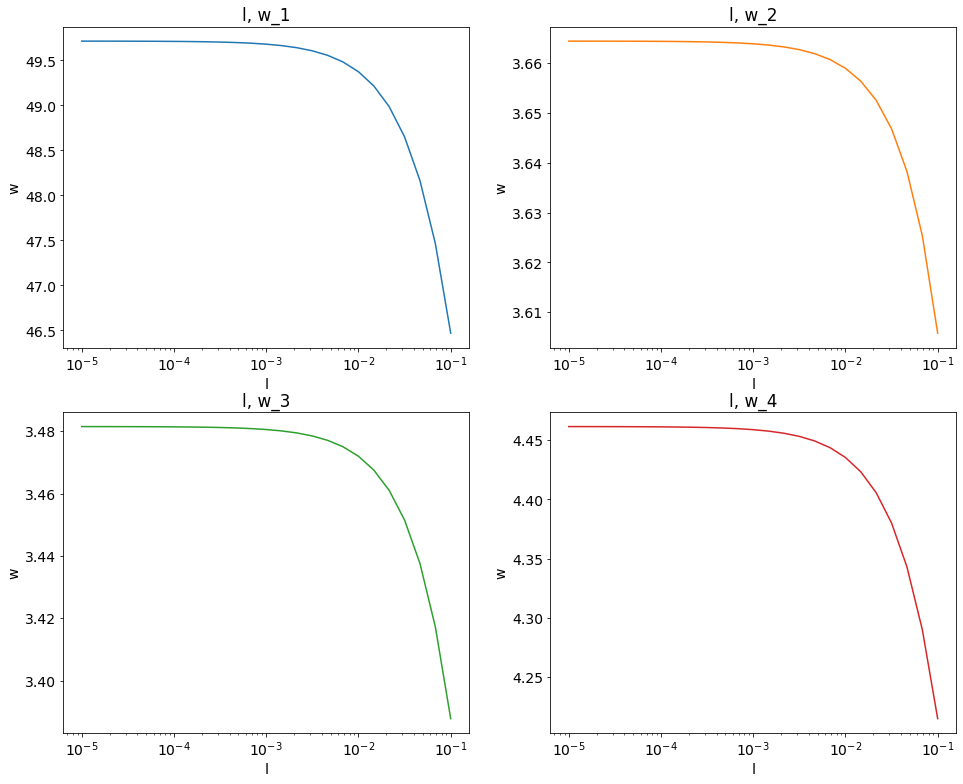

In [164]:
fig, axs = plt.subplots(2, 2, figsize=(16, 13))
axs[0, 0].plot(res[:,4], res[:,0])
axs[0, 1].plot(res[:,4], res[:,1], 'tab:orange')
axs[1, 0].plot(res[:,4], res[:,2], 'tab:green')
axs[1, 1].plot(res[:,4], res[:,3], 'tab:red')

for i, ax in enumerate(axs.flat):
    ax.set(xlabel='l', ylabel='w')
    ax.set_title(f'l, w_{i+1}')
    ax.set_xscale('log')

## Task №2

In [150]:
def calc_norm_feat(x):
    res = (x - x.min()) / (x.max() - x.min())
    return res

In [158]:
print(calc_std_feat(calc_norm_feat(X[1])))

[-0.57142857 -0.57142857 -0.21428571 -0.57142857  0.14285714 -0.92857143
  0.85714286  2.64285714 -0.57142857 -0.21428571]


In [159]:
print(calc_std_feat(X[1]))

[-0.57142857 -0.57142857 -0.21428571 -0.57142857  0.14285714 -0.92857143
  0.85714286  2.64285714 -0.57142857 -0.21428571]


In [160]:
print(calc_norm_feat(calc_std_feat(X[1])))

[0.1 0.1 0.2 0.1 0.3 0.  0.5 1.  0.1 0.2]


### Ответ: можно, если сначала применить нормализацию, а затем стандартизацию.